<a href="https://colab.research.google.com/github/Ropoga19/Final/blob/main/Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importar Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from collections import Counter
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from plotly.figure_factory import create_2d_density as density


# ***PREPROCESAMIENTO***

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Tesis/dataproyecto_B.csv', sep = ';')
x = dataset.iloc[0:761,0:8]
y = dataset.iloc[:,8]
print(x.shape) 
print(y.shape) 

(761, 8)
(761,)


In [ ]:
print(x)

     Genero  Edad  Estado civil  Comuna  Ingreso  PadreB  Pruebas  Failed
0         0     1             0       0        2       1        0       0
1         0     1             0       2        2       1        1       2
2         0     1             0       0        2       1        1       0
3         0     1             0       2        3       1        1       0
4         0     1             0       3        3       1        1       0
..      ...   ...           ...     ...      ...     ...      ...     ...
756       0     3             1       1        3       1        1       1
757       0     3             0       0        2       1        0       2
758       0     3             0       0        3       0        1       0
759       0     0             0       0        3       1        1       1
760       1     2             0       3        3       1        0       0

[761 rows x 8 columns]


In [4]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
756    0
757    0
758    0
759    0
760    0
Name: desertores, Length: 761, dtype: int64


In [8]:
px.pie(dataset,'Genero')

In [9]:
px.pie(dataset,'Edad')

In [11]:
px.pie(dataset,'Estado civil')

In [15]:
count = Counter(dataset['Comuna'])
data = pd.DataFrame({'Sector':count.keys(), 'Número de estudiantes':count.values()})
px.bar(data, 'Sector', 'Número de estudiantes')

In [17]:
count = Counter(dataset['Ingreso'])
data = pd.DataFrame({'Ingresos Familiar':count.keys(), 'Número de estudiantes':count.values()})
px.bar(data, 'Ingresos Familiar', 'Número de estudiantes')

In [18]:
px.pie(dataset,'PadreB')

In [19]:
count = Counter(dataset['Pruebas'])
data = pd.DataFrame({'Punta Pruebas Saber':count.keys(), 'Número de estudiantes':count.values()})
px.bar(data, 'Punta Pruebas Saber', 'Número de estudiantes')

In [23]:
count = Counter(dataset['Failed'])
data = pd.DataFrame({'Asignaturas perdidas':count.keys(), 'Número de estudiantes':count.values()})
px.bar(data, 'Asignaturas perdidas', 'Número de estudiantes')


In [41]:
#Crear las variables Dummy
# se toman las columnas 1 y 3 por ser categoricas
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_x = LabelEncoder()
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [7])],remainder='passthrough') 
x = np.array(ct.fit_transform(x))
print(x) 

[[1. 0. 0. ... 2. 1. 0.]
 [0. 0. 1. ... 2. 1. 1.]
 [1. 0. 0. ... 2. 1. 1.]
 ...
 [1. 0. 0. ... 3. 0. 1.]
 [0. 1. 0. ... 3. 1. 1.]
 [1. 0. 0. ... 3. 1. 0.]]


In [42]:
print(x.shape)

(761, 10)


In [43]:
#dividir el dataset en entrenamiento y prueba

# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# **ÁRBOLES DE DECISIÓN**

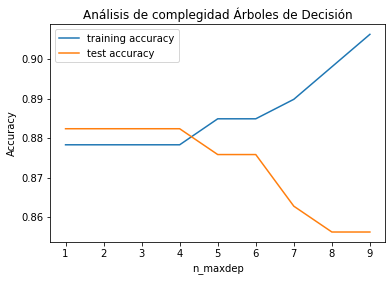

In [44]:
"""       ÁRBOLES DE DECISIÓN        """

# Crear el modelo 
from sklearn.tree import DecisionTreeClassifier

# Análisis de complegidad con DecisionTree
training_accuracy = []
test_accuracy = []

# try n_max_depth from 1 to 10
maxdep_settings = range(1, 10)

for n_maxdep in maxdep_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth = n_maxdep)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

# Se realiza la Gráfica
plt.plot(maxdep_settings, training_accuracy, label="training accuracy")
plt.plot(maxdep_settings, test_accuracy, label="test accuracy")
plt.title("Análisis de complegidad Árboles de Decisión")
plt.ylabel("Accuracy")
plt.xlabel("n_maxdep")
plt.legend()

In [45]:
# Se crea el Modelo y se entrena
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth=5, random_state = 0)
classifier.fit(x_train, y_train)
print("Training set score", classifier.score(x_train, y_train))
print("Test set score", classifier.score(x_test, y_test))

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(x_test)

Training set score 0.8799342105263158
Test set score 0.8823529411764706


In [46]:
"""    EVALUACIÓN DEL MODELO """

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(x_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Matriz de Confusión")
print (cm)

print("Training set score", classifier.score(x_train, y_train))
print("Test set score", classifier.score(x_test, y_test))


Matriz de Confusión
[[135   0]
 [ 18   0]]
Training set score 0.8799342105263158
Test set score 0.8823529411764706


# **RANDON FOREST**

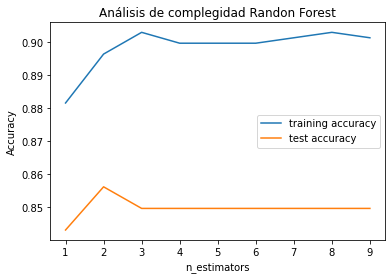

In [47]:
"""    Random Forest      """

# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier

# Análisis de complegidad con DecisionTree
training_accuracy = []
test_accuracy = []

# try n_max_depth from 1 to 10
n_estimators_settings = range(1, 10)

for n_est in n_estimators_settings:
    # build the model
    clf = RandomForestClassifier(n_estimators = n_est, criterion = "entropy", max_depth= 10, random_state = 0)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

# Se realiza la Gráfica
plt.plot(n_estimators_settings, training_accuracy, label="training accuracy")
plt.plot(n_estimators_settings, test_accuracy, label="test accuracy")
plt.title("Análisis de complegidad Randon Forest")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [48]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
classifier = RandomForestClassifier(n_estimators = 4, criterion = "entropy", max_depth= 10, random_state = 0)
classifier.fit(x_train, y_train)
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(x_test)

In [49]:
"""    EVALUACIÓN DEL MODELO """

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(x_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Matriz de Confusión")
print (cm)

print("Training set score", classifier.score(x_train, y_train))
print("Test set score", classifier.score(x_test, y_test))


Matriz de Confusión
[[129   6]
 [ 17   1]]
Training set score 0.899671052631579
Test set score 0.8496732026143791


# **K - VECINOS**

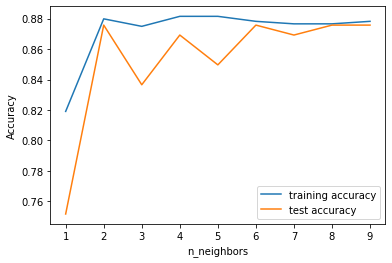

In [50]:
"""             K - Vecinos       """
from sklearn.neighbors import KNeighborsClassifier

# Análisis de complegidad con KNN
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

# Se realiza la Gráfica
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [51]:
"""             K - Vecinos       """
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.neighbors import KNeighborsClassifier
# Ajustar el clasificador en el Conjunto de Entrenamiento
classifier = KNeighborsClassifier(n_neighbors = 6, metric = "minkowski", p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [52]:
"""    EVALUACIÓN DEL MODELO """

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(x_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Matriz de Confusión")
print (cm)

print("Training set score", classifier.score(x_train, y_train))
print("Test set score", classifier.score(x_test, y_test))

#Calculo de la Exactitud
from sklearn.metrics import accuracy_score
Exactitud = accuracy_score(y_test, y_pred)
print ("Exactitud del Modelo: ", Exactitud)


Matriz de Confusión
[[134   1]
 [ 18   0]]
Training set score 0.8782894736842105
Test set score 0.8758169934640523
Exactitud del Modelo:  0.8758169934640523


# **REGRESIÓN LOGíSTICA**

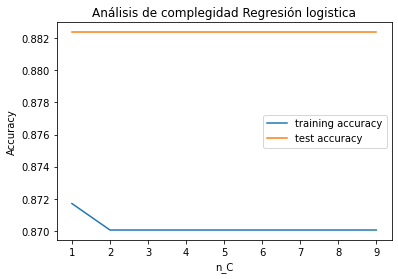

In [53]:
"""       REGRESIÓN LOGISTICA"""

# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento
from sklearn.linear_model import LogisticRegression

# Análisis de complegidad con Regression Logistic
training_accuracy = []
test_accuracy = []

# try n_max_depth from 1 to 10
C_settings = np.arange(1, 10)

for n_C in C_settings:
    # build the model
    clf = LogisticRegression(C = n_C)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

# Se realiza la Gráfica
plt.plot(C_settings, training_accuracy, label="training accuracy")
plt.plot(C_settings, test_accuracy, label="test accuracy")
plt.title("Análisis de complegidad Regresión logistica")
plt.ylabel("Accuracy")
plt.xlabel("n_C")
plt.legend()

In [54]:
# Crear y entrenar el modelo
classifier = LogisticRegression(C= 10, random_state = 0)
classifier.fit(x_train, y_train)

"""    EVALUACIÓN DEL MODELO """

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(x_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Matriz de Confusión")
print (cm)

print("Training set score", classifier.score(x_train, y_train))
print("Test set score", classifier.score(x_test, y_test))


Matriz de Confusión
[[135   0]
 [ 18   0]]
Training set score 0.8700657894736842
Test set score 0.8823529411764706


# **MÁQUINAS DE SOPORTE VECTORIAL**

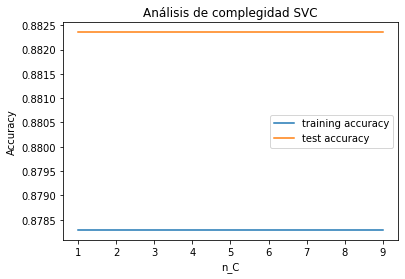

In [55]:
"""           MÁQUINAS DE SOPORTE VECTORIAL   """
from sklearn.svm import SVC

# Análisis de complegidad con DecisionTree
training_accuracy = []
test_accuracy = []

# try n_max_depth from 1 to 10
C_settings = range(1, 10)

for n_C in C_settings:
    # build the model
    clf = SVC(C = n_C)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))

# Se realiza la Gráfica
plt.plot(C_settings, training_accuracy, label="training accuracy")
plt.plot(C_settings, test_accuracy, label="test accuracy")
plt.title("Análisis de complegidad SVC")
plt.ylabel("Accuracy")
plt.xlabel("n_C")
plt.legend()

In [56]:
"""    EVALUACIÓN DEL MODELO """
# Ajustar el SVM en el Conjunto de Entrenamiento
classifier = SVC(C= 6, kernel = "linear", random_state = 0)
classifier.fit(x_train, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(x_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Matriz de Confusión")
print (cm)

print("Training set score", classifier.score(x_train, y_train))
print("Test set score", classifier.score(x_test, y_test))


Matriz de Confusión
[[135   0]
 [ 18   0]]
Training set score 0.8782894736842105
Test set score 0.8823529411764706
